# Medical Appointments Record Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset shows the data for showing and not showing up for 110k medical aapointments in Brazil. it also includes some charachterstics and information for people who showed up and didn's show up. We want to know if there's any relation between showing up for appointments and characterestics of patients using EDA, Moreover, we will ask the quesion about the relation between being alcoholic and not showing up.

In [1]:
#importing needed modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [2]:
df=pd.read_csv('noshowappointments.csv')

### Assessing Data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [8]:
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Quality Issues
1- "ScheduledDay" and "AppointmentDay" columns are strings instead of datetime object.

2- Age column has a value that's less than 0 which is the least possible value and indicates a baby that's less than 1 year old.

3- No possible use for "AppointmentID" column in the analysis.

4- "Yes" and "No" in "No-show" column could cause a consistency issue.

5- The dash in "No-show" column could cause errors. 


### Data Cleaning

In [10]:
# making a copy of the original dataframe first.
df_clean=df.copy()

##### define:
The "ScheduledDay" and "AppointmentDay" columns should be converted to datetime objects instead of strings.

In [11]:
df_clean.ScheduledDay=pd.to_datetime(df_clean.ScheduledDay)
df_clean.AppointmentDay=pd.to_datetime(df_clean.ScheduledDay)

##### test:

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

##### define:
The value that's less than 0 in "Age" column should be dropped.

##### code:

In [13]:
df_clean=df_clean.query("Age>=0")

##### test:

In [14]:
df_clean.query("Age<0").value_counts().sum()

0

##### define:
The "AppointmentID" column should be dropped.

##### code:

In [15]:
df_clean.drop("AppointmentID",axis=1,inplace=True)

##### test:

In [16]:
df_clean.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### define:
 "Yes" and "No" in "No-show" column should be replaced with 1 and 0.

##### code:

In [17]:
df_clean["No-show"].replace({"Yes":1,"No":0},inplace=True)

##### test:

In [18]:
df_clean["No-show"].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

##### define:
I will replace the dash in the "no-show" column with an underscore.

##### code:

In [19]:
df_clean.rename(columns={"No-show": "no_show"},inplace=True)

##### test:

In [20]:
df_clean.No_show

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 110526, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Which gender doesn't show up more?

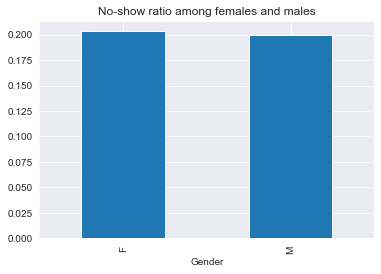

In [21]:
df_clean.groupby('Gender')['No_show'].mean().plot(kind="bar",title="No-show ratio among females and males");

The bar chart shows a slight difference between numbers of males and females who don't show up.

### what is the relation between different ages and showing up? 

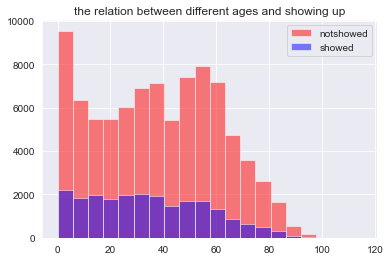

In [22]:
df_showed=df_clean.loc[df_clean['No_show']==1]
df_notshowed=df_clean.loc[df_clean['No_show']==0]
df_notshowed.Age.hist(alpha=.5,color="red",bins=20,label='notshowed')
df_showed.Age.hist(alpha=.5,color='blue',bins=20, label='showed')
plt.title("the relation between different ages and showing up")
plt.legend();

The histograms show that the number of people who didn't show up is significantly larger than the number of people who showed up, and that the younger their age, the more likely they won't show up for their medical appointments.

### Is there a relation between being alcoholic and not showing up?

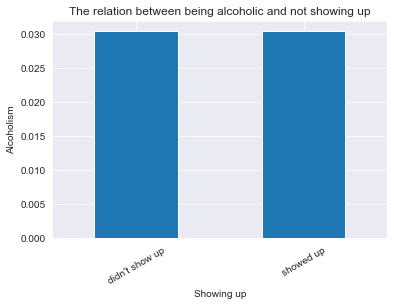

In [23]:
df_clean.groupby('No_show')['Alcoholism'].mean().plot(kind='bar')
plt.xlabel('Showing up')
plt.ylabel('Alcoholism')
plt.xticks([0,1],["didn't show up",'showed up'],rotation=30)
plt.title('The relation between being alcoholic and not showing up');

This bar chart suggests that there's no relation whatsoever between beng alcoholic and not showing up for medical appointments.

<a id='conclusions'></a>
## Conclusions
The histograms generally indicate that the number of people who didn't show up is significantly larger than the number of people who showed up, and that the younger their age, the more likely they won't show up for their medical appointments, however, we can't say for sure that this result is accurate, because this can be due to having much larger number of young-age people than old people.  
The first bar chart shows that the number of females that showed up for appointments is slightly higher than the number of males which indicates that gender isn't an important characteristic for showing up.  
The second bar chart indicates that being alcoholic doesn't affect showing up for the appointmens.
